# Introduction to Image Analysis with Python.

Please see the slides which accompany this notebook for a theorectical underpinning of what is being taught.
Please approach each exercise in order. You may work with other members of the course if you like. This practical is not assessed. If you are stuck at any stage please ask a demonstrator.


## Reading images

Exercise: Explore how to open simple tiff images using the PIL library.


Populating the interactive namespace from numpy and matplotlib
image dimensions (256, 256)  im dtype: uint8


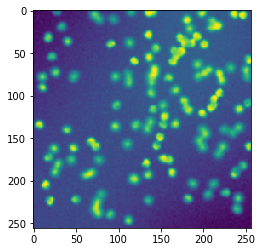

In [1]:
#This line is very important: (It turns on inline the visuals!)
%pylab inline
#This library is one of the libraries one can use for importing tiff files.
#For detailed info:http://effbot.org/imagingbook/image.htm
from PIL import Image

#We import our cell_fluorescent.tif image
im = Image.open('images/cell_fluorescent.tif')
#This line converts our image object into a numpy array (matrix) allowing easy processing of the data.
im_array = np.array(im)
#Notice the dimensions and data type.
print('image dimensions',im_array.shape, ' im dtype:',im_array.dtype)

#This is an inline visual. It displays the output image it after your code.
figsize(4,4)
imshow(im_array)
#Notice the scale on the side of the image. What happens when you index a range.
#imshow(im_array[50:100,:])
#Or what happens when you index every fifth pixel:
#imshow(im_array[::5,::5],interpolation='nearest')
#Notice interpolation. What do you thing this is doing?


In [2]:
#Repeat the above step but for the image cell_colony.tif.
#Experiment with changing the look-up-table:
#imshow(im_array, cmap="Reds")
#more colors at: http://matplotlib.org/examples/color/colormaps_reference.html

## Applying a threshold to an image

Exercise: Apply threshold to image array.

image min:  4 image max:  252 thr:  100


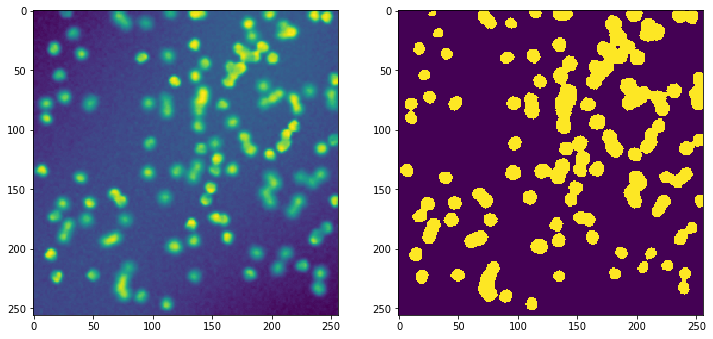

In [3]:
thr = 100; #Here we define an arbitary threshold.

print('image min: ',np.min(im_array),'image max: ',np.max(im_array), 'thr: ',thr)
#Here we can very easily apply a threshold to the image.
binary = im_array>thr

figsize(12,12)
subplot(1,2,1)
imshow(im_array)
subplot(1,2,2)
imshow(binary)
#Experiment with different threholds and show the results side-by-side.

## Reading a multi-page tiff with multiple z-slices

Exercise: Explore the z-slices and how to visualise them.

image dimensions (27, 226, 186)  im dtype: uint8


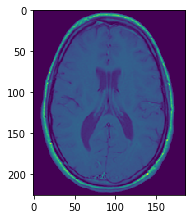

In [4]:
#Make sure you have previously run %pylab inline at least once.
#This library is another one of the libaries we can use to import tiff files
#It also works with formats such as .lsm which are tiff's in disguise.
from tifffile import imread as imreadtiff

#We import our mri-stack.tif image file.
im = imreadtiff('images/mri-stack.tif')
#Notice the dimensions and data type.
print('image dimensions',im.shape, ' im dtype:',im.dtype)

#This line converts our image object into a numpy array and then accesses the fifteenth slice.
im_slice = im[15,:,:]

#This activates a subplot which can be used to display more than one image in a grid.
figsize(6,6)
subplot(1,2,1)
imshow(im_slice)


## Applying a threshold to a multi-page tiff.

Exercise: Apply threshold to single slice of multi-page tiff.

image min:  0 image max:  202 thr:  100


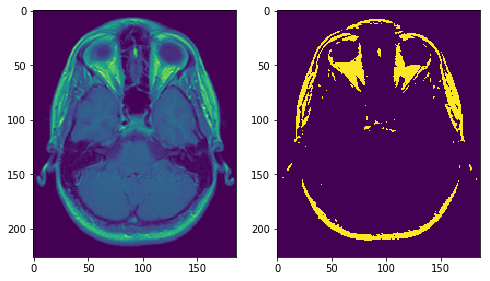

In [5]:
#Make sure you have previously run %pylab inline at least once.
#from tifffile import imread as imreadtiff
im_stack = imreadtiff('images/mri-stack.tif')
im_slice = im_stack[5,:,:]
thr = 100; #Here we define an arbitary threshold.

print('image min: ',np.min(im_slice),'image max: ',np.max(im_slice), 'thr: ',thr)
#Here we can very easily apply a threshold to the image.
binary = im_slice>thr
#Now we show the binary mask.
figsize(8,8)
subplot(1,2,1)
imshow(im_slice)
subplot(1,2,2)
imshow(binary)

#What happens when you change the direction of the sign from '>' to '<'.
#Hopefully the result makes sense.



## Image Processing: Applying filters to an image.

### Gaussian filter

Exercise: Import gaussian_filter from scipy ndimage and apply Gaussian blur to an image.

image dimensions (256, 256)  im dtype: float64


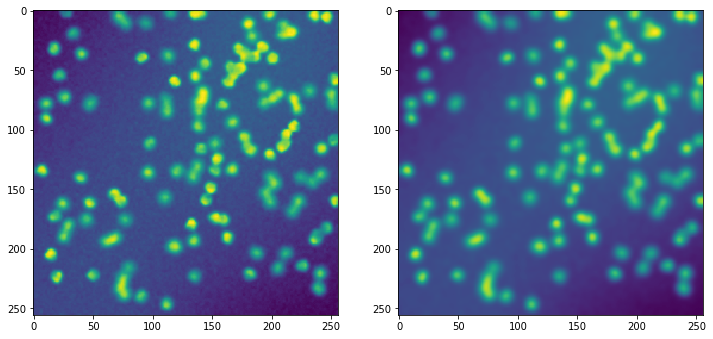

In [6]:
#Make sure you have previously run %pylab inline at least once.
#Make sure you have imported cell_fluorescent.tiff and created im_array.
from scipy.ndimage import gaussian_filter



#This applies a Gaussian smoothing kernel to the image with standard deviation=2.0
im_smth = gaussian_filter(im_array.astype(np.float64), sigma=2.0)

#Until this point we have been using a numpy array with a data type uint8. This means the
#pixel intensity values are within the range of 0-255.
#Now we convert the image to np.float64 as we want to have floating pixel outputs. This is 
#because operations like guassian filtering produce non-integer outputs and we don't want to
#lose this information by storing the data as integers.

#Notice the dimensions and data type.
print('image dimensions',im_smth.shape, ' im dtype:',im_smth.dtype)

figsize(12,12)
subplot(1,2,1)
imshow(im_array)
subplot(1,2,2)
imshow(im_smth)

#Try applying a different sigma and visualising.

### Median filter
Exercise: Import median_filter from scipy.ndimage and apply median filter to an image.

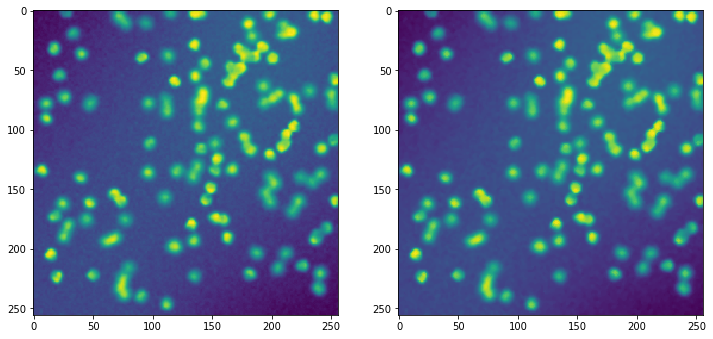

In [7]:
#Make sure you have previously run %pylab inline at least once.
#Make sure you have imported cell_fluorescent.tiff and created im_array.
from scipy.ndimage import median_filter

#This applies a median filter kernel to the image. For for details of this filter.
#https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.filters.median_filter.html
im_medin = median_filter(im_array.astype(np.float64),footprint=np.ones((3,3)))

figsize(12,12)
subplot(1,2,1)
imshow(im_array)
subplot(1,2,2)
imshow(im_medin)

#Try applying a different footprint and visualising.

### Mean filter
Exercise: Import convolve from scipy.signal and apply mean filter to an image.

Average pixel intensity of im_array (input) 77.80134582519531
Average pixel intensity of im_mean (output) 77.50790235731337
You should notice the average intensities of the input and output are very similar.


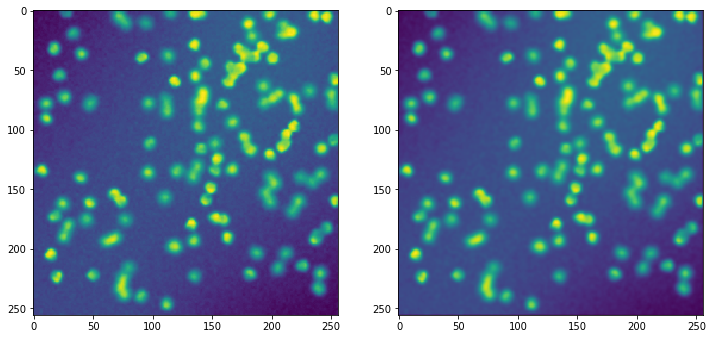

In [8]:
#Make sure you have previously run %pylab inline at least once.
#Make sure you have imported cell_fluorescent.tiff and created im_array.
from scipy.signal import convolve2d
sz_of_filt = 3

#This is our mean filter kernel. 
kernel = np.ones(((sz_of_filt),sz_of_filt)).astype(np.float64)
#We convolve the image with the kernel and then we divide the image by the size of our filter squared to normalise.
#Refer to slide 8 of lecture notes for more details.
#Please find the convolve filter documentation here:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
im_mean = convolve2d(im_array.astype(np.float64),kernel , mode='same')/(sz_of_filt*sz_of_filt)
print('Average pixel intensity of im_array (input)',np.average(im_array))
print('Average pixel intensity of im_mean (output)',np.average(im_mean))
print('You should notice the average intensities of the input and output are very similar.')
figsize(12,12)
subplot(1,2,1)
imshow(im_array)
subplot(1,2,2)
imshow(im_mean)

#Try applying a different size footprint and visualising.
#What happens to the average intensity of the output when your remove the normalisation.
#Can you see why we include the normalisation?

### Edge filter
Exercise: Import convolve from scipy.signal and apply sobel edge kernel to an image.


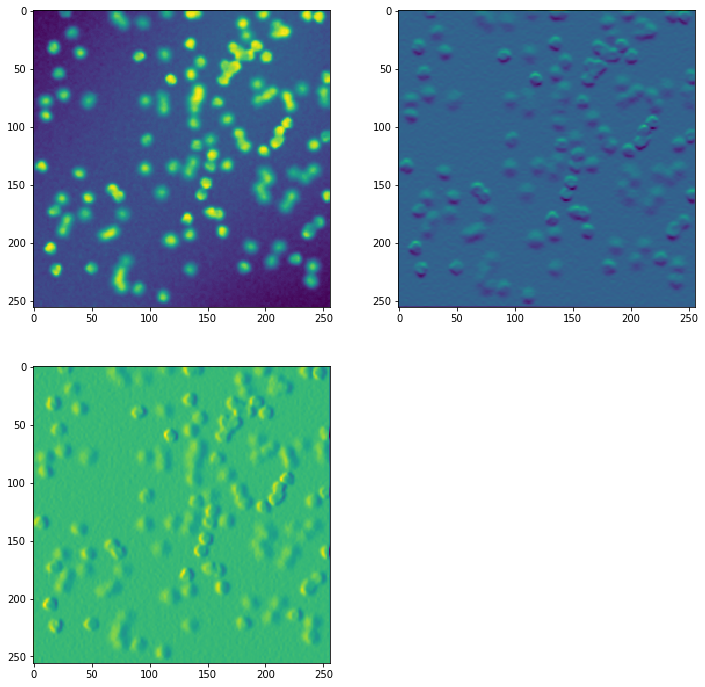

In [9]:
#Make sure you have previously run %pylab inline at least once.
#Make sure you have imported cell_fluorescent.tiff and created im_array.
from scipy.signal import convolve2d


#This is our dx kernel and dy kernel for a sobel filter.
#https://en.wikipedia.org/wiki/Edge_detection
kerneldx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]]).astype(np.float64)
kerneldy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).astype(np.float64)
#We convolve the image with an edge filter. The sum of the filter is zero and so no need to normalise
#Please find the convolve filter documentation here:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
im_dy = convolve2d(im_array.astype(np.float64),kerneldy , mode='same')
im_dx = convolve2d(im_array.astype(np.float64),kerneldx , mode='same')

figsize(12,12)
subplot(2,2,1)
imshow(im_array)
subplot(2,2,2)
imshow(im_dy)
subplot(2,2,3)
imshow(im_dx)

#Notice the mode arguement of the convolve2d command. This controls how the pixels located at the edge of the image
#are handled. What happens to the size of the image if you change these values. You might want to look at what the
#boundary command does as well.

### Edge filter comparison
Exercise: Use the scipy ndimage filter and compare it to the custom one produced above.


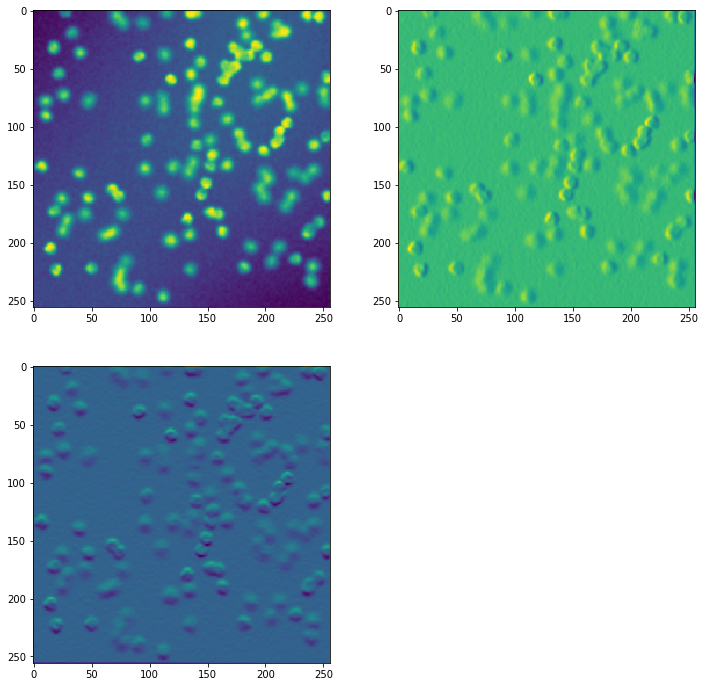

In [10]:
#Make sure you have previously run the Edge Filter cell.
from scipy.ndimage.filters import sobel

figsize(12,12)
subplot(2,2,1)
imshow(im_array)
subplot(2,2,2)
im_sob_dx = sobel(im_array.astype(np.float64), axis=1, mode='constant', cval=0.0)
imshow(im_sob_dx)
subplot(2,2,3)
im_sob_dy = sobel(im_array.astype(np.float64), axis=0, mode='constant', cval=0.0)
imshow(im_sob_dy)

#Using the settings above the images produced are identical to those produced by convolve2d.
#How can you test they are identical?



# Summary
In this notebook you have learnt to:
- Read a tiff image.
- Change the look-up table of imshow.
- Read a multi-page tiff image.
- Apply a basic threshold to an image
- Apply a number of filters manually and using the convolve2d command